## Data Mining – Spring 2024
## Homework Assignment 4: kNN. Linear Models. Feature Engineering

Rules:

* The homework assignment is worth 10 points.

* You may use without proof any results covered in the course lectures or seminars, provided that deriving these results is not the subject of the assignment.

* You may use any freely available sources with *mandatory* citation of the links.

* Plagiarism is not allowed. If cases of copying are detected, all parties involved in the violation will receive a score of 0 for the assignment, even if it is possible to determine who copied from whom.

* Try to make the code as optimized as possible. In particular, the use of loops will be penalized in cases where the operation can be performed using the tools of libraries covered in the course.

### Задание 1:  Визуализация решающих поверхностей в kNN.

In this assignment, we will visualize the decision surface of a kNN classifier to clearly see how the classifier makes decisions for new objects. For simplicity, we will work with the built-in `sklearn` dataset `wine`, which contains information about the characteristics of three types of wine. The dataset description can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) and [here](https://rdrr.io/cran/rattle.data/man/wine.html).

Let's load the dataset and store the feature information in variable X, and the dependent variable information in variable y.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Problem 1.1 (0.5 points)** Are there any missing values in the dataset? If yes, remove them. Are there any categorical variables in the dataset? If yes, encode them using One-Hot Encoding. Use [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

There are no missing values

In [ ]:
X.duplicated().sum()

0

There are no duplicates

In [ ]:
(X.dtypes == "object").values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

There are no categorical variables.

**Problem 1.2 (0.5 points)** Using the `train_test_split()` function, split the dataset into training and testing sets, and set the proportion of the testing set to 0.3. Since the split is done randomly, do not forget to set `np.random.seed()` to ensure reproducibility of the results.

Use the `stratify` argument when splitting. Why is this important?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Stratify helps maintain class balance, ensuring that the target variable is balanced across different classes.

**Problem 1.3 (1 point)** On the training set, train six kNN classifiers differing only in the number of neighbors. For the first classifier, set the number of neighbors to 1, for the second – 3, for the third – 5, for the fourth – 10, for the fifth – 15, and for the sixth – 25 (pay attention to the `n_neighbors` parameter of the `KNeighborsClassifier` class). For training, use only two features: `alcohol` and `magnesium` – and Euclidean distance. Do not forget to scale the features, for example, using the `StandardScaler` module.

Print the accuracy score on the training and test sets for each classifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
X_norm_train = pd.DataFrame(data=StandardScaler().fit_transform(X_train))
X_norm_train.columns = X.columns.tolist()
X_norm_test = pd.DataFrame(data=StandardScaler().fit_transform(X_test))
X_norm_test.columns = X.columns.tolist()

In [ ]:
c_1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
c_1.fit(X_norm_train[['alcohol', 'magnesium']], y_train)

y1_predicted_train = c_1.predict(X_norm_train[['alcohol', 'magnesium']])
y1_predicted_test = c_1.predict(X_norm_test[['alcohol', 'magnesium']])
print("train.Accuracy: ", np.mean(y_train == y1_predicted_train))
print("test.Accuracy: ", np.mean(y_test == y1_predicted_test))

train.Accuracy:  1.0
test.Accuracy:  0.5370370370370371


In [ ]:
c_3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
c_3.fit(X_norm_train[['alcohol', 'magnesium']], y_train)

y3_predicted_train = c_3.predict(X_norm_train[['alcohol', 'magnesium']])
y3_predicted_test = c_3.predict(X_norm_test[['alcohol', 'magnesium']])
print("train.Accuracy: ", np.mean(y_train == y3_predicted_train))
print("test.Accuracy: ", np.mean(y_test == y3_predicted_test))

train.Accuracy:  0.7983870967741935
test.Accuracy:  0.6296296296296297


In [ ]:
c_5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
c_5.fit(X_norm_train[['alcohol', 'magnesium']], y_train)

y5_predicted_train = c_5.predict(X_norm_train[['alcohol', 'magnesium']])
y5_predicted_test = c_5.predict(X_norm_test[['alcohol', 'magnesium']])
print("trainAccuracy: ", np.mean(y_train == y5_predicted_train))
print("test.Accuracy: ", np.mean(y_test == y5_predicted_test))

trainAccuracy:  0.782258064516129
test.Accuracy:  0.7037037037037037


In [ ]:
c_10 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
c_10.fit(X_norm_train[['alcohol', 'magnesium']], y_train)

y10_predicted_train = c_10.predict(X_norm_train[['alcohol', 'magnesium']])
y10_predicted_test = c_10.predict(X_norm_test[['alcohol', 'magnesium']])
print("train.Accuracy: ", np.mean(y_train == y10_predicted_train))
print("test.Accuracy: ", np.mean(y_test == y10_predicted_test))

train.Accuracy:  0.75
test.Accuracy:  0.6851851851851852


In [ ]:
c_15 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
c_15.fit(X_norm_train[['alcohol', 'magnesium']], y_train)

y15_predicted_train = c_15.predict(X_norm_train[['alcohol', 'magnesium']])
y15_predicted_test = c_15.predict(X_norm_test[['alcohol', 'magnesium']])
print("train.Accuracy: ", np.mean(y_train == y15_predicted_train))
print("test.Accuracy: ", np.mean(y_test == y15_predicted_test))

train.Accuracy:  0.717741935483871
test.Accuracy:  0.6481481481481481


In [ ]:
c_25 = KNeighborsClassifier(n_neighbors=25, metric='euclidean')
c_25.fit(X_norm_train[['alcohol', 'magnesium']], y_train)

y25_predicted_train = c_25.predict(X_norm_train[['alcohol', 'magnesium']])
y25_predicted_test = c_25.predict(X_norm_test[['alcohol', 'magnesium']])
print("train.Accuracy: ", np.mean(y_train == y25_predicted_train))
print("test.Accuracy: ", np.mean(y_test == y25_predicted_test))

train.Accuracy:  0.6935483870967742
test.Accuracy:  0.6666666666666666


In [ ]:
train_1 = np.mean(y_train == y1_predicted_train)
train_3 = np.mean(y_train == y3_predicted_train)
train_5 = np.mean(y_train == y5_predicted_train)
train_10 = np.mean(y_train == y10_predicted_train)
train_15 = np.mean(y_train == y15_predicted_train)
train_25 = np.mean(y_train == y25_predicted_train)

test_1 = np.mean(y_test == y1_predicted_test)
test_3 = np.mean(y_test == y3_predicted_test)
test_5 = np.mean(y_test == y5_predicted_test)
test_10 = np.mean(y_test == y10_predicted_test)
test_15 = np.mean(y_test == y15_predicted_test)
test_25 = np.mean(y_test == y25_predicted_test)
df = pd.DataFrame({'train': [train_1, train_3, train_5, train_10, train_15, train_25], 'test': [test_1, test_3, test_5, test_10, test_15, test_25]})
df.index.rename('NN', inplace='True')
df.rename(index={0: 1, 1: 3, 2: 5, 3: 10, 4: 15, 5: 25}, inplace='True')
df

,train,test
NN,,
1,1.000000,0.537037
3,0.798387,0.629630
5,0.782258,0.703704
10,0.750000,0.685185
15,0.717742,0.648148
25,0.693548,0.666667


**Problem 1.4 (0 points)** Install the `mlxtend` library using the command below. The library can also be installed from the terminal using `pip` or `conda`, as described [here](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

If everything was successful, you will see a message like "successfully installed" in the output above, and the next cell will execute without errors.

In [ ]:
import mlxtend

**Task 1.5 (1 point)** The `mlxtend` library allows for relatively simple visualization of decision surfaces of trained classifiers. Study the [documentation](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) of the library and find out how to plot a grid of decision surface graphs. Create such a grid of graphs for the classifiers trained above.

**Hints:**
1. You can use the ready-made code provided in the documentation and adapt it for our case.
2. You may need additional libraries used in the example from the documentation.
3. Pay attention to how to adjust the parameters `gridspec.GridSpec()` and `itertools.product()` for our number of classifiers.
4. In the `plot_decision_region()` function, use `y_train` and the relevant columns from `X_train`. You may need to convert them into a `numpy` array format.
5. If you save the trained classifiers in a list in task 1.3, you will not need to retrain them.
6. Plotting the graph may take some time – be prepared to wait a bit!

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

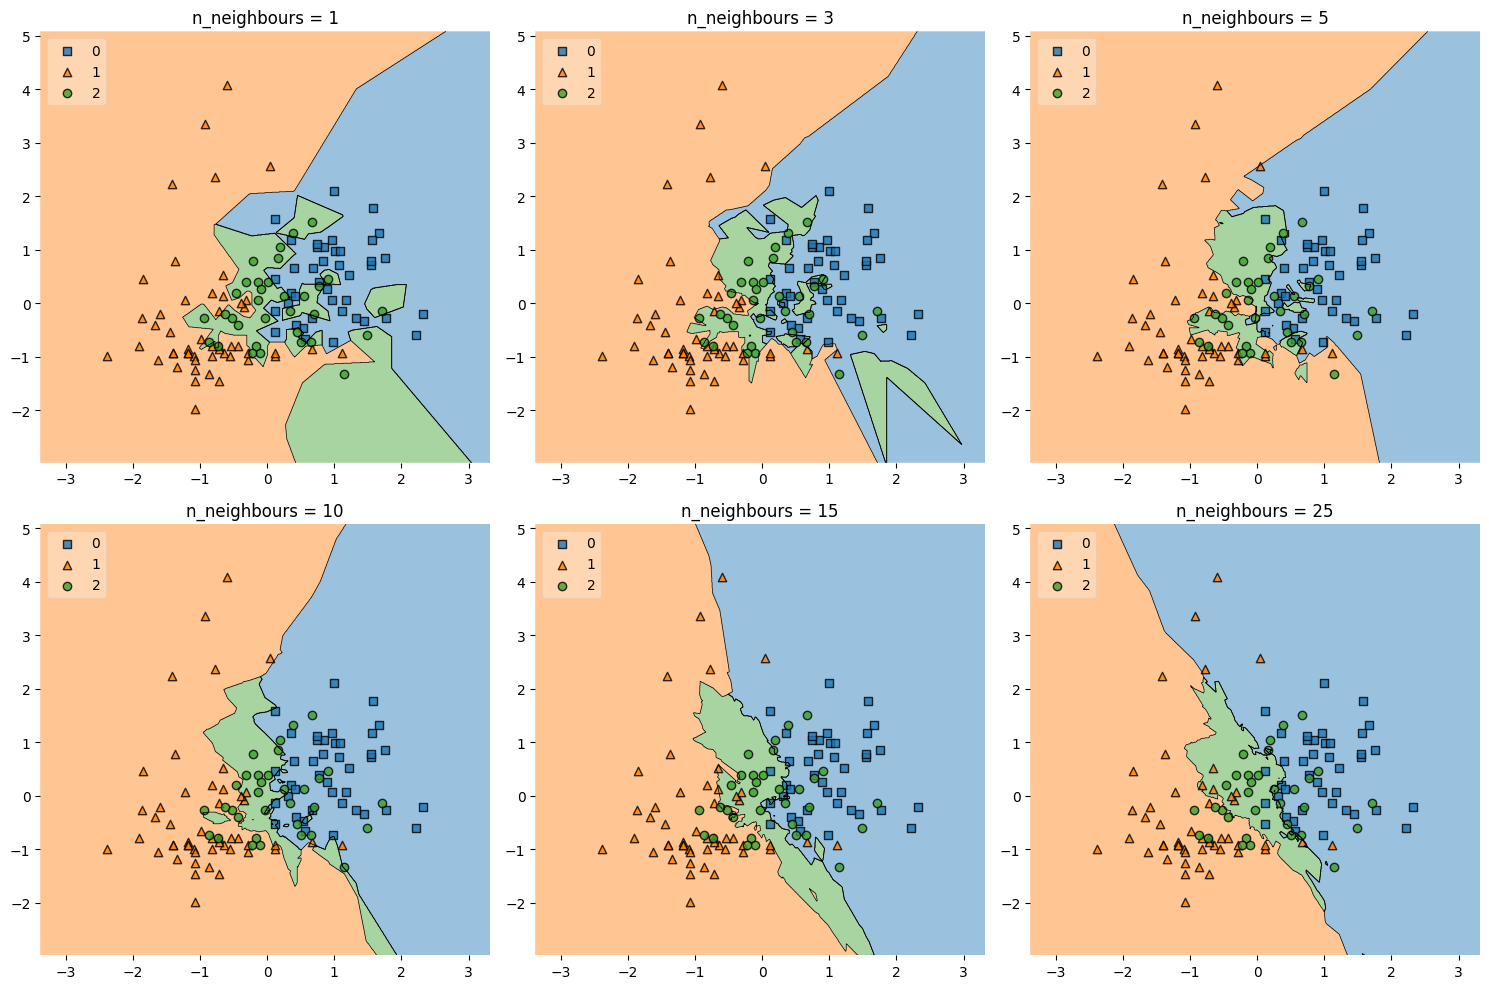

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15, 10))
labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']

classifiers = [c_1, c_3, c_5, c_10, c_15, c_25]

for clf, lab, grd in zip(classifiers, labels, itertools.product(range(2), range(3))):
    clf.fit(X_norm_train[['alcohol', 'magnesium']], y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=np.array(X_norm_train[['alcohol', 'magnesium']]), y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.tight_layout()
plt.show()


**Task 1.6 (0.5 points)** Comment on the results obtained in tasks 1.3 and 1.5. What number of neighbors is optimal for training the classifier? Justify your choice by describing the geometry of the data and the resulting decision surface. Which results clearly indicate overfitting of the model? Why?

Based on third task, the most optimal number of neighbors is 5, since in this case the accuracy on the test set is the highest (relative to other k), and the quality on the training set is also one of the highest (k=1 is not considered, because in that case the accuracy on the train set will always be 100%).

### Assignment 2. KNN from Scratch. 2 Points

In this assignment, we will try to implement the KNN algorithm from scratch. In this case, we will try to create KNN for classification.

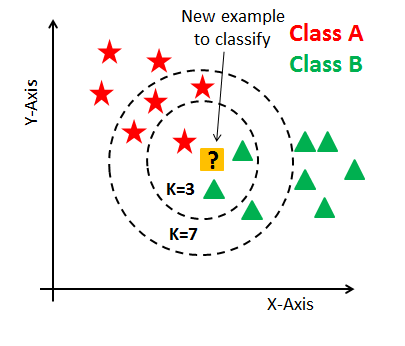

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y
      pass

    def predict(self, X):
      predictions = np.array([])
      for p in X:
        distances = [self.count_distance(p, x_train) for x_train in self.X_train]
        nearest_indices = np.argsort(distances)[:self.k]
        nearest_labels = [self.y_train[i] for i in nearest_indices]
        most_common_label = Counter(nearest_labels).most_common(1)[0][0]
        predictions = np.append(predictions, most_common_label)
      return predictions
      pass

    def count_distance(self, x, y):
      return np.linalg.norm(x - y)
      pass

In [ ]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
test_knn(KNN)

### Assignment 3: Linear Regression

In this assignment, we will examine various aspects of building a linear model. We will work with one of the classic datasets in statistics, containing information about diamonds. The description can be viewed [here](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We will solve the problem of predicting a diamond's `price` based on its characteristics.

**Task 3.1 (0.2 points)** Are there missing values in the dataset? If yes, remove them.
Are there meaningless columns in the dataset (features that do not carry additional information)? If yes, remove them.

In [ ]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
new_data = data.drop('Unnamed: 0', axis=1)
y_new = new_data['price']
X_new = new_data.drop('price', axis=1)
X_new

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


The 'Unnamed: 0' column does not carry any importance in terms of influencing the target variable, therefore we will delete it.

**Task 3.2 (0.1 points)** Linear regression is based on the assumption of a linear relationship between the features and the target variable. Therefore, before selecting variables to include in the model, it makes sense to check how well this assumption holds. For the following tasks, we will also need the sample correlation matrix between the features. Print the sample correlation matrix between all real-valued features and the target variable (i.e., this matrix will have $k+1$ rows, where $k$ is the number of real-valued features).

Which real-valued features are most correlated with the target variable?

In [ ]:
new_data.corr(numeric_only = True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


The most correlated with price (the target variable) are such real-valued features as the diamond's weight (carat), x, y, and depth z. Price is least correlated with the variables depth and table.

**Task 3.3 (0.1 points)** Since a linear model sums the values of features with certain weights, we need to carefully handle categorical features. Encode the categorical variables using One-Hot Encoding.

In [ ]:
X_new = pd.get_dummies(X_new)
X_new

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,5.69,5.75,3.61,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,5.66,5.68,3.56,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,6.15,6.12,3.74,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


**Task 3.4 (0.2 points)** Split the dataset into training and test sets. Specify the test set size as 0.3. Don't forget about the `stratify` parameter.

In [ ]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)
y_new_train

19497     8131
31229      756
22311    10351
278       2795
6646      4092
         ...  
11284     4975
44732     1617
38158     1014
860       2871
15795     6320
Name: price, Length: 37758, dtype: int64

**Task 3.5 (0.3 points)** Often, when using linear models, real-valued features are scaled. While this causes the coefficient estimates to lose their direct statistical interpretation ("an increase of 1 in $X_1$ leads to an increase of $w_1$ in $y$"), it provides properties useful in machine learning tasks. In this task, scale the real-valued features of the training and test sets using the `StandardScaler` module.

In [ ]:
X_norm_new_train = pd.DataFrame(data=StandardScaler().fit_transform(X_new_train[['carat', 'depth', 'table', 'x', 'y', 'z']]))
X_norm_new_train.reset_index(drop=True, inplace=True)
X_norm_new_train = pd.concat([X_norm_new_train, X_new_train.iloc[:, 6:].reset_index(drop=True)], axis=1)

X_norm_new_test = pd.DataFrame(data=StandardScaler().fit_transform(X_new_test[['carat', 'depth', 'table', 'x', 'y', 'z']]))
X_norm_new_test.reset_index(drop=True, inplace=True)
X_norm_new_test = pd.concat([X_norm_new_test, X_new_test.iloc[:, 6:].reset_index(drop=True)], axis=1)

X_norm_new_train = X_norm_new_train.rename(columns={0: 'carat', 1: 'depth', 2: 'table', 3: 'x', 4: 'y', 5: 'z'})
X_norm_new_test = X_norm_new_test.rename(columns={0: 'carat', 1: 'depth', 2: 'table', 3: 'x', 4: 'y', 5: 'z'})
y_new_train

19497     8131
31229      756
22311    10351
278       2795
6646      4092
         ...  
11284     4975
44732     1617
38158     1014
860       2871
15795     6320
Name: price, Length: 37758, dtype: int64

**Task 3.6 (0.2 points)** Fit a linear regression model on the training set. Print the mean squared error on both the training and test sets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression().fit(X_norm_new_train, y_new_train)
print(f"MSE on Train: {mean_squared_error(y_new_train, lin_reg.predict(X_norm_new_train))}")
print(f"MSE on Test: {mean_squared_error(y_new_test, lin_reg.predict(X_norm_new_test))}")

MSE on Train: 1290543.1311133567
MSE on Test: 1250311.1104612765


**Task 3.7 (0.2 points)** Study the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) of the `LinearRegression` module and print the obtained coefficient estimates. Name the real-valued variables whose coefficient estimates in absolute value are an order of magnitude larger than the estimates for the other real-valued variables.

In [ ]:
df = pd.DataFrame(lin_reg.coef_.reshape(1, 26), columns = X_norm_new_train.columns)

df
print(lin_reg.coef_)

[ 5.33861567e+03 -9.01738170e+01 -6.03322799e+01 -1.10041885e+03
 -6.45891672e+00 -3.42589446e+01 -5.92557732e+02  2.96334798e+00
  2.53638525e+02  1.85212231e+02  1.50743628e+02  8.35314553e+02
  6.18285586e+02  5.62010577e+02  3.35154315e+02 -1.63320116e+02
 -6.40769680e+02 -1.54667524e+03 -3.88960977e+03  1.56942753e+03
 -1.37900094e+02 -1.10766922e+03  7.68224542e+02  4.47115818e+02
  1.21172542e+03  1.13868577e+03]


In [ ]:
X_norm_new_train

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,0.526206,0.458541,0.691128,0.663511,0.672581,0.715243,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
37754,-0.693436,-0.521432,-1.105327,-0.628540,-0.635646,-0.676312,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
37755,-0.987832,-1.011418,0.242014,-1.109717,-1.115329,-1.182333,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
37756,0.210782,0.738533,0.691128,0.351636,0.253949,0.391952,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


**Task 3.8 (0.4 points)** As can be noted from the correlation matrix analysis in task 3.2, there is a strong correlation between some features, which may indicate the problem of *multicollinearity*. The differences in the order of magnitude of the coefficients identified in the previous task also hint at its presence. As known, to solve this problem, one can either exclude some features from the model or use regularization. We will use the second option.

Recall that the purpose of regularization is to change the loss function to eliminate problems arising from multicollinearity. For L1 regularization, the following loss function is proposed for minimization:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

This model is called Lasso regression.

For L2 regularization, the following loss function is proposed for minimization:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

This model is called Ridge regression.

Train a Lasso regression and a Ridge regression model, setting the regularization hyperparameter to 10. Use the `Lasso` and `Ridge` modules from `sklearn` for this purpose. Have the weights decreased significantly? Draw a conclusion about how pronounced the multicollinearity problem was in the original regression.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(10.0).fit(X_norm_new_train, y_new_train)
print("Lasso")
print(f"Train: {mean_squared_error(y_new_train, lasso.predict(X_norm_new_train))}")
print(f"Test: {mean_squared_error(y_new_test, lasso.predict(X_norm_new_test))}")

ridge = Ridge(10.0).fit(X_norm_new_train, y_new_train)
print("\nRidge")
print(f"Train: {mean_squared_error(y_new_train, ridge.predict(X_norm_new_train))}")
print(f"Test: {mean_squared_error(y_new_test, ridge.predict(X_norm_new_test))}")

Lasso
Train: 1327975.7057138297
Test: 1278239.9942142298

Ridge
Train: 1290707.9778318761
Test: 1249840.7537038778


In [ ]:
Lasso(10.0).fit(X_norm_new_train, y_new_train).coef_

array([ 4853.40739909,  -100.46514209,   -80.37216498,  -696.79432665,
          -0.        ,   -32.59993671,  -443.36703066,   -32.4723396 ,
          83.50657025,     0.        ,     0.        ,   350.36177962,
         176.45265678,   131.48716613,     0.        ,  -433.42870965,
        -846.57796325, -1649.84448353, -3635.74589994,   725.38630506,
        -617.76877444, -1525.26469024,   160.05675048,   -24.5732152 ,
         538.33430484,   512.22000913])

In [ ]:
Ridge(10.0).fit(X_norm_new_train, y_new_train).coef_

array([ 5.29892672e+03, -8.88228457e+01, -6.08045502e+01, -1.05874512e+03,
       -9.05173053e+00, -3.74052479e+01, -5.94943225e+02,  3.00864886e+00,
        2.54502004e+02,  1.85250613e+02,  1.52181959e+02,  8.30398469e+02,
        6.14575881e+02,  5.58387548e+02,  3.33496909e+02, -1.63364514e+02,
       -6.37518249e+02, -1.53597604e+03, -3.81549375e+03,  1.54924303e+03,
       -1.46088154e+02, -1.11144763e+03,  7.57957050e+02,  4.38420152e+02,
        1.19964356e+03,  1.12776574e+03])

**Task 3.9 (0.4 points)** As discussed in the seminars, Lasso regression can be used for selecting the most informative features. For the following values of the regularization parameter $\alpha$: 0.1, 1, 10, 100, 200 – train Lasso and Ridge regression models and plot a graph showing the change in the Euclidean norm of the weights (`np.linalg.norm()` applied to the vector of coefficient estimates) depending on the parameter $\alpha$. As known, the norm is a numerical characteristic of the magnitude of a vector, and therefore the norm can indicate how large the elements of the coefficient estimate vector are.

Which method reduces the weights more aggressively? Explain why Lasso regression is often used for feature selection.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+07, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


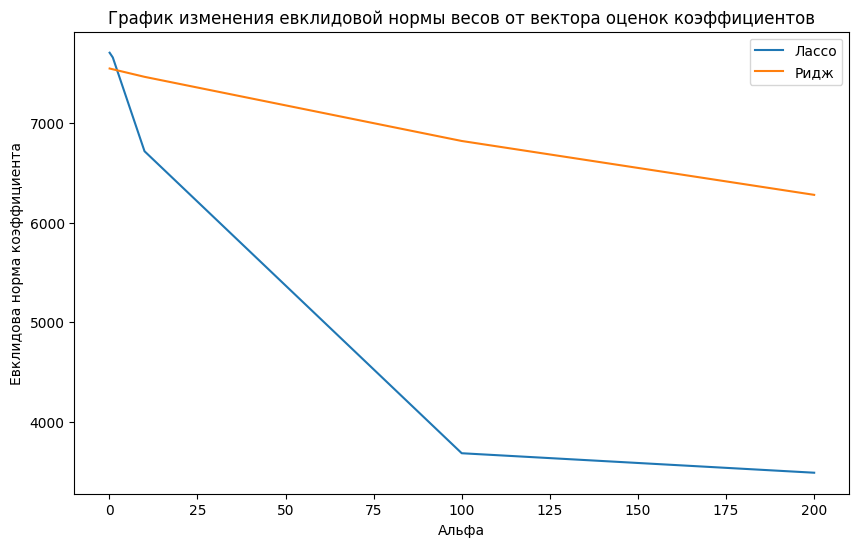

In [ ]:
alphas = [0.1, 1, 10, 100, 200]

# Initializing empty arrays to store the weight norms.
lasso_norms = np.array([])
ridge_norms = np.array([])

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_norm_new_train, y_new_train)
    lasso_norms = np.append(lasso_norms, np.linalg.norm(lasso.coef_))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_norm_new_train, y_new_train)
    ridge_norms = np.append(ridge_norms, np.linalg.norm(ridge.coef_))

# Plotting the graph of weight norm changes.
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_norms, label='Лассо')
plt.plot(alphas, ridge_norms, label='Ридж')
plt.title('График изменения евклидовой нормы весов от вектора оценок коэффициентов')
plt.xlabel('Альфа')
plt.ylabel('Евклидова норма коэффициента')
plt.legend()

**Task 3.10 (0.5 points)**  
Depending on the value of the $\alpha$ parameter in Lasso regression, different coefficient estimates become zero. The optimal value of $\alpha$ can be selected, for example, using cross-validation on the training set.

To perform cross-validation, you can use the `LassoCV` module. This module accepts a list of $\alpha$ values (the `alphas` parameter) and, during training, performs cross-validation for each value in this list, storing the MSE for each cross-validation fold (the number of folds is the `cv` parameter) in an error matrix (i.e., the resulting matrix will have dimensions `len(alphas)` $\times$ `cv`). After training the model, the error matrix can be accessed via the `.mse_path_` attribute.

Note that the model may use $\alpha$ values in a different order than you provide them in the function: use the `.alphas_` attribute to determine the order. Set the number of cross-validation folds (the `cv` parameter) to 5.

Average the errors for each $\alpha$ value (i.e., across the rows of the error matrix) and select the value that yields the highest quality.

In [ ]:
from sklearn.linear_model import LassoCV

lasso_new = LassoCV(alphas=alphas, cv=5)
lasso_new.fit(X_norm_new_train, y_new_train)
lasso_alphas = lasso_new.alphas_
best_alpha_index = np.argmin(np.mean(lasso_new.mse_path_, axis=1))
best_alpha = lasso_new.alphas_[best_alpha_index]
print(f'best_alpha = {best_alpha}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511839176.27344894, tolerance: 48476565.465277866
  model = cd_fast.enet_coordinate_descent_gram(


best_alpha = 1.0


**Task 3.11 (0.5 points)** Train the final Lasso regression model with the selected $\alpha$ parameter on the training set. Print the obtained coefficients and comment on which features turned out to be non-informative and which were the most informative. Provide a possible semantic explanation for this result.

In [ ]:
lasso_alpha_01 = Lasso(best_alpha).fit(X_norm_new_train, y_new_train)
print(lasso_alpha_01.coef_)

[ 5.29002306e+03 -9.12120699e+01 -6.22005902e+01 -1.06166303e+03
 -3.48515804e+00 -3.46220112e+01 -7.14616558e+02 -1.37728050e+02
  9.96422438e+01  2.82041480e+01  0.00000000e+00  4.85581175e+02
  2.72765059e+02  2.17597703e+02  0.00000000e+00 -4.91670590e+02
 -9.62758336e+02 -1.85843705e+03 -4.35789015e+03  9.91165423e+02
 -6.79818400e+02 -1.64329451e+03  2.13563392e+02 -9.38878823e+01
  6.50461728e+02  5.82067174e+02]


**Task 3.12 (0.4 points)** Make predictions with the trained Lasso regression model on the test set and compare the mean squared error with the error of the ordinary linear regression from task 3.6. Which model is better to use for predictions? Provide a possible explanation for why one model performed better than the other.

In [ ]:
print(f"Test: {mean_squared_error(y_new_test, lasso_alpha_01.predict(X_norm_new_test))}")
print(f"Train: {mean_squared_error(y_new_test, lin_reg.predict(X_norm_new_test))}")

Test: 1249653.612780159
Train: 1250342.953794682
